In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


##### Step 1: Define Paths and Parameters

In [2]:
train_dir = os.path.join('Dataset', 'images.cv_jzk6llhf18tm3k0kyttxz', 'data', 'train')
test_dir = os.path.join('Dataset', 'images.cv_jzk6llhf18tm3k0kyttxz', 'data', 'test')
val_dir = os.path.join('Dataset', 'images.cv_jzk6llhf18tm3k0kyttxz', 'data', 'val')

In [3]:
# Define image size
img_height, img_width = 224, 224

# Define batch size
batch_size = 32

##### Step 2: Create Data Generators

In [4]:
# For training: apply data augmentation and rescaling.

train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values to [0, 1]
    rotation_range=20,        # Random rotations up to 20 degrees
    zoom_range=0.2,           # Random zoom in/out
    horizontal_flip=True,     # Random horizontal flip
    width_shift_range=0.1,    # Random horizontal shifts
    height_shift_range=0.1    # Random vertical shifts
)

In [5]:
# For validation and test sets: only rescaling.

val_test_datagen = ImageDataGenerator(rescale=1./255)

##### Step 3: Load Images from Directories

In [6]:
# Training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 6225 images belonging to 11 classes.


In [7]:
# Validation generator
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1092 images belonging to 11 classes.


In [8]:
# Test generator
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3187 images belonging to 11 classes.


##### Step 4: Inspect the Loaded Data

In [9]:
print("Train Class Indices:", train_generator.class_indices)
print("Validation Class Indices:", val_generator.class_indices)
print("Test Class Indices:", test_generator.class_indices)

Train Class Indices: {'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}
Validation Class Indices: {'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}
Test Class Indices: {'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food 

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
class_count = len(train_generator.class_indices)
class_count

11

##### Build a Deeper CNN Model from scratch.

In [12]:
model = Sequential([
    # Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Block 4 - Additional convolutional block for deeper learning
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(class_count, activation='softmax')
])

c:\python_VSC\GUVI_Projects\guvi_projects_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the Model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Print model summary to inspect the architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 26,874,411 (102.52 MB)

 Trainable params: 26,871,467 (102.51 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [15]:
# Define Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [16]:
# Train the Model with Early Stopping
epochs = 20

history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, validation_data=val_generator, validation_steps=val_generator.samples // batch_size, epochs=epochs, callbacks=[early_stopping])

c:\python_VSC\GUVI_Projects\guvi_projects_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 947s 5s/step - accuracy: 0.5083 - loss: 1.5972 - val_accuracy: 0.1838 - val_loss: 15.3533
Epoch 2/20
  1/194 ━━━━━━━━━━━━━━━━━━━━ 15:25 5s/step - accuracy: 0.8125 - loss: 0.6623

c:\python_VSC\GUVI_Projects\guvi_projects_env\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


194/194 ━━━━━━━━━━━━━━━━━━━━ 38s 170ms/step - accuracy: 0.8125 - loss: 0.6623 - val_accuracy: 0.1691 - val_loss: 15.2881
Epoch 3/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 1072s 6s/step - accuracy: 0.6572 - loss: 1.0095 - val_accuracy: 0.2335 - val_loss: 11.5839
Epoch 4/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 42s 190ms/step - accuracy: 0.7188 - loss: 0.8613 - val_accuracy: 0.2316 - val_loss: 11.1840
Epoch 5/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 1081s 6s/step - accuracy: 0.8228 - loss: 0.5207 - val_accuracy: 0.6682 - val_loss: 1.1464
Epoch 6/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 40s 181ms/step - accuracy: 0.8750 - loss: 0.3978 - val_accuracy: 0.6351 - val_loss: 1.2561
Epoch 7/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 1116s 6s/step - accuracy: 0.8485 - loss: 0.4524 - val_accuracy: 0.7482 - val_loss: 0.9054
Epoch 8/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 39s 177ms/step - accuracy: 0.9062 - loss: 0.2646 - val_accuracy: 0.7445 - val_loss: 0.9224
Epoch 9/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 1081s 6s/step - accuracy: 0.8945 - loss: 0.3146 - val_

In [17]:
test_loss, test_accuracy, *other_metrics = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

99/99 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9401 - loss: 0.1814
Test Accuracy: 92.52%


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=list(test_generator.class_indices.keys())))
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred, labels=list(test_generator.class_indices.values())))

100/100 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step
Classification Report
                                  precision    recall  f1-score   support

                     animal fish       0.97      0.99      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.98      0.85      0.91       298
   fish sea_food gilt_head_bream       0.78      0.95      0.86       305
   fish sea_food hourse_mackerel       0.76      1.00      0.86       286
        fish sea_food red_mullet       1.00      0.95      0.97       291
     fish sea_food red_sea_bream       0.97      0.99      0.98       273
          fish sea_food sea_bass       1.00      0.66      0.80       327
            fish sea_food shrimp       0.91      0.99      0.95       289
fish sea_food striped_red_mullet       0.98      0.91      0.94       293
             fish sea_food trout       0.99      1.00      0.99       292

                        accuracy              

c:\python_VSC\GUVI_Projects\guvi_projects_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python_VSC\GUVI_Projects\guvi_projects_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python_VSC\GUVI_Projects\guvi_projects_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

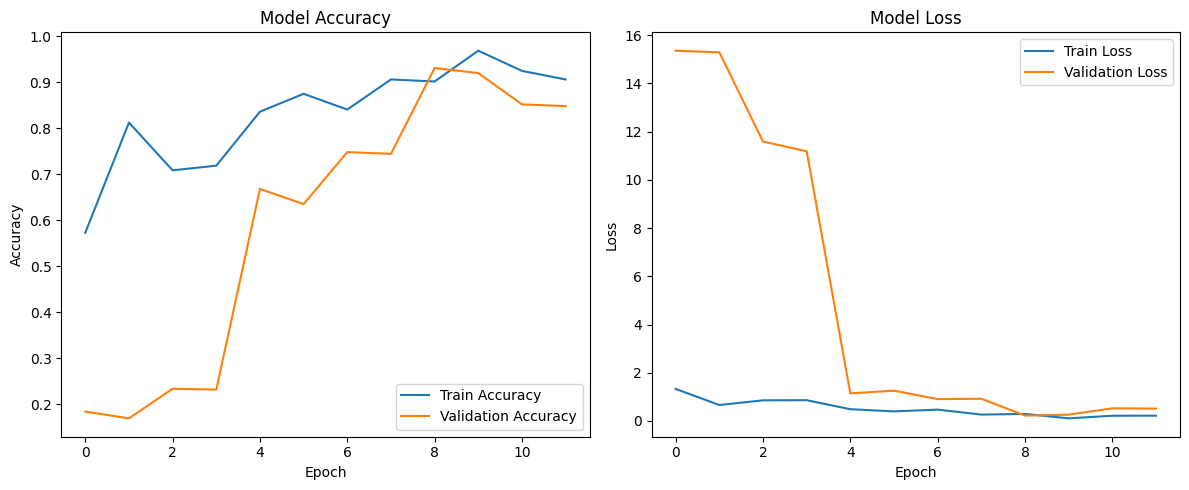

In [19]:
# Visualize Training History

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
import os

os.makedirs('models', exist_ok=True)
model.save('models/cnn_fish_model.h5')

##### Transfer Learning with five pre-trained models (e.g., VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0).

In [ ]:
# Image generators for InceptionV3 only
inception_train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

inception_val_gen = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

In [ ]:
# Transfer Learning with Pre-trained Models

from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def build_and_train_model(base_model_class, model_name, train_gen, val_gen, input_shape=(224, 224, 3), class_count=3, epochs=20):
    base_model = base_model_class(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False  # Freeze base model

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(class_count, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

    print(f"Training {model_name}...")
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        callbacks=[early_stopping]
    )

    model.save(f"{model_name}_fish_model.h5")
    print(f"{model_name} model saved!")

    return model, history


In [ ]:
# VGG16
vgg_model, vgg_history = build_and_train_model(VGG16, "VGG16", train_generator, val_generator, (img_height, img_width, 3), class_count)

# ResNet50
resnet_model, resnet_history = build_and_train_model(ResNet50, "ResNet50", train_generator, val_generator, (img_height, img_width, 3), class_count)

# MobileNetV2
mobilenet_model, mobilenet_history = build_and_train_model(MobileNetV2, "MobileNetV2", train_generator, val_generator, (img_height, img_width, 3), class_count)

# InceptionV3 (requires 299x299 image input)
inception_model, inception_history = build_and_train_model(InceptionV3, "InceptionV3", inception_train_gen, inception_val_gen, (299, 299, 3), class_count)

# EfficientNetB0
efficientnet_model, efficientnet_history = build_and_train_model(EfficientNetB0, "EfficientNetB0", train_generator, val_generator, (img_height, img_width, 3), class_count)
